In [1]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw
import numpy as np

In [148]:
df_features = pd.read_csv('../Experiments_result_analysis/mdf_rdkit_dash_features_2980.csv')

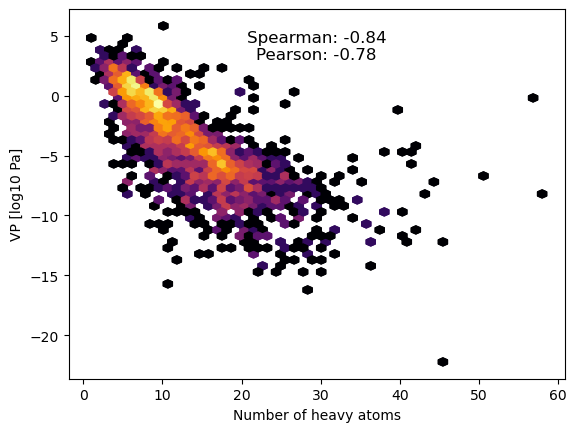

In [156]:
#plot vp against number of heavy atoms
import matplotlib.pyplot as plt
hexbin = plt.hexbin(df_features['NumHeavyAtoms'], df_features['vp'], gridsize=50, cmap='inferno', bins='log', mincnt=1)
counts = plt.hexbin(df_features['NumHeavyAtoms'], df_features['vp'], gridsize=50, cmap='inferno', bins='log', mincnt=1).get_array()
spearman = df_features['NumHeavyAtoms'].corr(df_features['vp'], method='spearman')
pearson = df_features['NumHeavyAtoms'].corr(df_features['vp'], method='pearson')
plt.text(0.5, 0.9, f'Spearman: {np.round(spearman, 2)}\nPearson: {np.round(pearson, 2)}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=12)
plt.xlabel('Number of heavy atoms')
plt.ylabel('VP [log10 Pa]')
plt.show()

In [158]:
counts = hexbin.get_array()
bin_positions = hexbin.get_offsets()

# Get the indices of bins where the count is 1
single_point_bins = np.where(counts == 1)

# Extract the corresponding points
single_point_coordinates = bin_positions[single_point_bins]

# Print or use the result as needed
print("Points where counts are 1:")
print(len(single_point_coordinates))

Points where counts are 1:
179


In [157]:
#get linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(df_features['NumHeavyAtoms'].values.reshape(-1, 1), df_features['vp'].values.reshape(-1, 1))
print(f'Linear regression: {lr.coef_[0][0]}x + {lr.intercept_[0]}')


Linear regression: -0.42398567162021217x + 2.066915039574393


/tmp/ipykernel_3998424/1665429011.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furthest_points['residuals'] = residuals.iloc[sorted_indices]


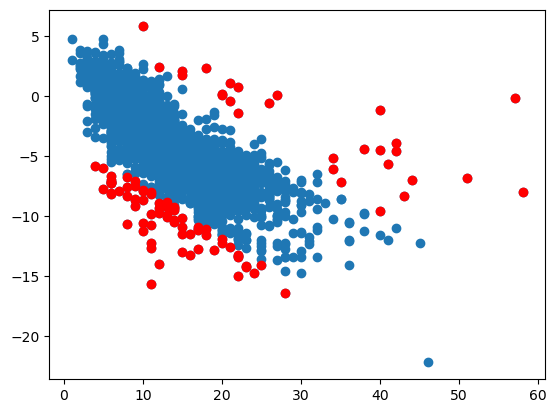

In [159]:
# Calculate the residuals
residuals = df_features['vp'] - (-0.42398567162021217 * df_features['NumHeavyAtoms'] + 2.066915039574393)
sorted_indices = np.argsort(np.abs(residuals))[::-1]
furthest_points = df_features.iloc[sorted_indices]
furthest_points['residuals'] = residuals.iloc[sorted_indices]
mols_sorted_by_error = [Chem.MolFromMolBlock(molblock) for molblock in furthest_points['molblock']]
# Draw.MolsToGridImage(mols_sorted_by_error[:10], molsPerRow=5, subImgSize=(200, 200), legends=[f'{np.round(residual, 2)}' for residual in furthest_points['residuals'][:10]])
hunderd_furthest_points = furthest_points.iloc[:100]
plt.scatter(df_features['NumHeavyAtoms'], df_features['vp'])
plt.scatter(hunderd_furthest_points['NumHeavyAtoms'], hunderd_furthest_points['vp'], color='red')

In [160]:
hunderd_furthest_points

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,confid,molregno,mdfp,vp,NumHeavyAtoms,NumRotatableBonds,NumN,...,DASH_homo,DASH_lumo,DASH_max_abs_mbis,DASH_avg_abs_mbis,DASH_>03_abs_mbis,DASH_dual_elec,DASH_dual_nucl,DASH_conj,DASH_num_atoms,residuals
1211,1211,1214,1224,2340,2342,"[57, 6, 3, 6, 0, 0, 0, 0, 0, 0, -1668.89855538...",-0.176128,57,6,3,...,-0.191651,-0.103393,0.870117,0.238652,0.047619,0.0,0.0,0.238095,126,21.924140
14,14,14,14,2396,2398,"[58, 11, 0, 8, 0, 0, 0, 0, 0, 0, -585.17979718...",-8.000000,58,11,0,...,-0.168897,-0.112061,0.833496,0.238629,0.080645,0.0,0.0,0.274194,124,14.524254
1688,1688,1694,1706,2873,2875,"[40, 9, 1, 0, 27, 0, 0, 0, 0, 0, -9.8366249762...",-1.136677,40,9,1,...,-0.192571,-0.082207,0.716309,0.252563,0.150000,0.0,0.0,0.000000,40,13.755835
2222,2222,2231,2251,3428,3430,"[11, 0, 4, 3, 0, 0, 0, 0, 0, 0, -916.341934387...",-15.698970,11,0,4,...,-0.208164,-0.109522,0.965820,0.614136,0.461538,0.0,0.0,0.846154,13,-13.102043
353,353,353,354,1472,327,"[51, 6, 3, 6, 0, 0, 0, 0, 0, 0, -1503.50624064...",-6.786522,51,6,3,...,-0.196142,-0.068965,0.870117,0.243389,0.055556,0.0,0.0,0.277778,108,12.769832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,131,131,131,1252,107,"[14, 1, 3, 0, 0, 0, 1, 0, 0, 0, 107.1828444171...",-9.273038,14,1,3,...,-0.172004,-0.091094,0.601562,0.251168,0.095238,0.0,0.0,0.666667,21,-5.404154
2827,2827,2837,2862,4077,4079,"[11, 0, 0, 5, 0, 0, 0, 0, 0, 0, 188.4754799168...",-8.000037,11,0,0,...,-0.209347,-0.067752,0.666992,0.272558,0.190476,0.0,0.0,0.000000,21,-5.403110
2193,2193,2202,2222,3398,3400,"[13, 8, 0, 4, 0, 0, 0, 0, 0, 0, -324.630425633...",-8.843492,13,8,0,...,-0.209503,-0.085501,0.868164,0.313510,0.137931,0.0,0.0,0.206897,29,-5.398593
2338,2338,2347,2368,3546,3548,"[9, 1, 4, 3, 0, 0, 0, 0, 0, 0, 83.219642469861...",-7.109020,9,1,4,...,-0.201907,-0.120902,0.905762,0.535511,0.454545,0.0,0.0,0.818182,11,-5.360064


In [161]:
furthest_points['smiles'] =furthest_points['molblock'].apply(lambda x: Chem.MolToSmiles(Chem.MolFromMolBlock(x)))
furthest_points['inchikeys'] = furthest_points['molblock'].apply(lambda x: Chem.MolToInchiKey(Chem.MolFromMolBlock(x))) 
inchikey_to_vp = dict(zip(furthest_points['inchikeys'], furthest_points['vp']))

/tmp/ipykernel_3998424/384901232.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furthest_points['smiles'] =furthest_points['molblock'].apply(lambda x: Chem.MolToSmiles(Chem.MolFromMolBlock(x)))
/tmp/ipykernel_3998424/384901232.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furthest_points['inchikeys'] = furthest_points['molblock'].apply(lambda x: Chem.MolToInchiKey(Chem.MolFromMolBlock(x)))


In [ ]:
def canonical_smiles_from_name_or_smiles(smiles, sanitize = True):
    mol = Chem.MolFromSmiles(smiles, sanitize = sanitize)
    return Chem.MolToSmiles(mol,canonical=True, allHsExplicit=True,  kekuleSmiles = True, allBondsExplicit = True, isomericSmiles = True)

In [170]:
import pickle
import tqdm
df_reach = pd.read_csv("/localhome/cschiebroek/ShuZe/vp/data cleaning/reach_Vapour_4.csv", sep = "|", encoding='latin-1', header = 1)
cas2smiles = pickle.load(open("/localhome/cschiebroek/ShuZe/vp/data cleaning/cas_id_2_smiles.pickle", "rb"))
cas2smiles = {i:j for i,j in cas2smiles}
# mp_ochem_hashes = set([mdfptools.utils.hashing(i) for i in tqdm.tqdm_notebook(mp_df.SMILES)]) - {None}
df_reach["SMILES"] = [cas2smiles[i] if i in cas2smiles else False for i in df_reach.cas]
df_reach = df_reach[df_reach.SMILES != False]
df_reach = df_reach[[i != None for i in df_reach.SMILES]]
df_reach = df_reach[[Chem.MolFromSmiles(i) is not None for i in df_reach.SMILES]]
smiles = df_reach.SMILES.tolist()
smiles_shuzed = []
for smi in smiles:
    try:
        smiles_shuzed.append(canonical_smiles_from_name_or_smiles(smi))
    except:
        smiles_shuzed.append(smi)
df_reach['smiles_shuzed'] = smiles_shuzed
#get inchikeys
inchikeys = []
for smi in smiles:
    try:
        inchikeys.append(Chem.MolToInchiKey(Chem.MolFromSmiles(smi)))
    except:
        inchikeys.append('None')
df_reach['inchikey'] = inchikeys
df_reach

[16:15:28] WARNING: not removing hydrogen atom without neighbors
[16:15:28] WARNING: not removing hydrogen atom without neighbors
[16:15:28] WARNING: not removing hydrogen atom without neighbors
[16:15:28] WARNING: not removing hydrogen atom without neighbors
[16:15:28] WARNING: not removing hydrogen atom without neighbors
[16:15:28] WARNING: not removing hydrogen atom without neighbors
[16:15:28] WARNING: not removing hydrogen atom without neighbors
[16:15:28] SMILES Parse Error: syntax error while parsing: C[Sn](|[S]CC(=O)OCC(CC)CCCC)(|[S]CC(=O)OCC(CC)CCCC)|[S]CC(=O)OCC(CC)CCCC
[16:15:28] SMILES Parse Error: Failed parsing SMILES 'C[Sn](|[S]CC(=O)OCC(CC)CCCC)(|[S]CC(=O)OCC(CC)CCCC)|[S]CC(=O)OCC(CC)CCCC' for input: 'C[Sn](|[S]CC(=O)OCC(CC)CCCC)(|[S]CC(=O)OCC(CC)CCCC)|[S]CC(=O)OCC(CC)CCCC'
[16:15:28] SMILES Parse Error: syntax error while parsing: C[Sn](|[S]CC(=O)OCC(CC)CCCC)(|[S]CC(=O)OCC(CC)CCCC)|[S]CC(=O)OCC(CC)CCCC
[16:15:28] SMILES Parse Error: Failed parsing SMILES 'C[Sn](|[S]CC(

,#name,cas,iupacName,P (upperQualifier),P (upperValue),P (lowerQualifier),P (lowerValue),P (unit),T (upperQualifier),T (upperValue),T (lowerQualifier),T (lowerValue),T (unit),SMILES,smiles_shuzed,inchikey
0,Ô_-alanine,107-95-9,3-Aminopropionic acid,NaN,NaN,NaN,5.060000e-08,mm Hg,NaN,NaN,NaN,25.0,C,NCCC(O)=O,NCCC(O)=O,UCMIRNVEIXFBKS-UHFFFAOYSA-N
1,Ô_-alanine,107-95-9,3-Aminopropionic acid,NaN,NaN,NaN,6.740000e-06,Pa,NaN,NaN,NaN,25.0,C,NCCC(O)=O,NCCC(O)=O,UCMIRNVEIXFBKS-UHFFFAOYSA-N
2,Ô_-butyrolactone,96-48-0,oxolan-2-one,NaN,NaN,NaN,3.440000e-01,hPa,NaN,NaN,NaN,20.0,C,O=C1CCCO1,O=C1CCCO1,YEJRWHAVMIAJKC-UHFFFAOYSA-N
3,Ô_-butyrolactone,96-48-0,oxolan-2-one,NaN,NaN,NaN,4.000000e-01,hPa,NaN,NaN,NaN,20.0,C,O=C1CCCO1,O=C1CCCO1,YEJRWHAVMIAJKC-UHFFFAOYSA-N
4,Ô_-butyrolactone,96-48-0,oxolan-2-one,NaN,NaN,NaN,9.000000e-01,hPa,NaN,NaN,NaN,20.0,C,O=C1CCCO1,O=C1CCCO1,YEJRWHAVMIAJKC-UHFFFAOYSA-N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6127,vinyl laurate,2146-71-6,Vinyl laurate,NaN,NaN,NaN,2.800000e-01,Pa,NaN,NaN,NaN,25.0,C,CCCCCCCCCCCC(=O)OC=C,CCCCCCCCCCCC(=O)OC=C,GLVVKKSPKXTQRB-UHFFFAOYSA-N
6128,vinyl laurate,2146-71-6,Vinyl laurate,NaN,NaN,NaN,7.110000e-01,Pa,NaN,NaN,NaN,25.0,C,CCCCCCCCCCCC(=O)OC=C,CCCCCCCCCCCC(=O)OC=C,GLVVKKSPKXTQRB-UHFFFAOYSA-N
6130,vinylene carbonate,872-36-6,"1,3-dioxol-2-one",NaN,NaN,NaN,3.350000e+02,Pa,NaN,NaN,NaN,25.0,C,O=C1OC=CO1,O=C1OC=CO1,VAYTZRYEBVHVLE-UHFFFAOYSA-N
6131,warfarin,81-81-2,(RS)-4-hydroxy-3-(3-oxo-1-phenylbutyl)coumarin,NaN,NaN,NaN,3.470000e-03,Pa,NaN,NaN,NaN,20.0,C,CC(=O)CC(c1ccccc1)C2=C(O)Oc3ccccc3C2=O,CC(=O)CC(c1ccccc1)C2=C(O)Oc3ccccc3C2=O,QTXVAVXCBMYBJW-UHFFFAOYSA-N


In [171]:
import pandas as pd

def convert_log10_mmHg(x):
    return 10 ** float(x) * 133.322  # Convert log10(mmHg) to Pa

unit_conversion = {
    'hPa': 100,
    'Pa': 1,
    'mm Hg': 133.322,
    'kPa': 1000,
    'mBar': 100,
    'Torr': 133.322,
    'Bar': 100000,
    'PSI': 6894.76,
    'atm': 101325,
    'log10(mmHg)': pd.NA,
    'E-03 Pa': 0.001,
    'mg/mÎ_ air': 0.000001,
    'µPa': 1e-6,
    'E-10 Pa': 1e-10,
    'E-05 Pa': 1e-5,
    'Nm-2': 1,
    'e-20 Pa': 1e-20,
    'x10-4 mmHg': 0.000133322,
    'MPa': 1e6,
    'E-8 Pa': 1e-8,
    'E-7 Pa': 1e-7,
    'no data': pd.NA,
    'E -6 Pa': 1e-6,
    'E-6 Pa': 1e-6,
    '10-3 Pa': 0.001,
    'see below': pd.NA
}

df_reach['VP_Pa'] = df_reach.apply(lambda row: row['P (lowerValue)'] * unit_conversion.get(row['P (unit)'], 1), axis=1)
#drop Na
df_reach = df_reach.dropna(subset=['VP_Pa'])
df_reach


,#name,cas,iupacName,P (upperQualifier),P (upperValue),P (lowerQualifier),P (lowerValue),P (unit),T (upperQualifier),T (upperValue),T (lowerQualifier),T (lowerValue),T (unit),SMILES,smiles_shuzed,inchikey,VP_Pa
0,Ô_-alanine,107-95-9,3-Aminopropionic acid,NaN,NaN,NaN,5.060000e-08,mm Hg,NaN,NaN,NaN,25.0,C,NCCC(O)=O,NCCC(O)=O,UCMIRNVEIXFBKS-UHFFFAOYSA-N,0.000007
1,Ô_-alanine,107-95-9,3-Aminopropionic acid,NaN,NaN,NaN,6.740000e-06,Pa,NaN,NaN,NaN,25.0,C,NCCC(O)=O,NCCC(O)=O,UCMIRNVEIXFBKS-UHFFFAOYSA-N,0.000007
2,Ô_-butyrolactone,96-48-0,oxolan-2-one,NaN,NaN,NaN,3.440000e-01,hPa,NaN,NaN,NaN,20.0,C,O=C1CCCO1,O=C1CCCO1,YEJRWHAVMIAJKC-UHFFFAOYSA-N,34.4
3,Ô_-butyrolactone,96-48-0,oxolan-2-one,NaN,NaN,NaN,4.000000e-01,hPa,NaN,NaN,NaN,20.0,C,O=C1CCCO1,O=C1CCCO1,YEJRWHAVMIAJKC-UHFFFAOYSA-N,40.0
4,Ô_-butyrolactone,96-48-0,oxolan-2-one,NaN,NaN,NaN,9.000000e-01,hPa,NaN,NaN,NaN,20.0,C,O=C1CCCO1,O=C1CCCO1,YEJRWHAVMIAJKC-UHFFFAOYSA-N,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6127,vinyl laurate,2146-71-6,Vinyl laurate,NaN,NaN,NaN,2.800000e-01,Pa,NaN,NaN,NaN,25.0,C,CCCCCCCCCCCC(=O)OC=C,CCCCCCCCCCCC(=O)OC=C,GLVVKKSPKXTQRB-UHFFFAOYSA-N,0.28
6128,vinyl laurate,2146-71-6,Vinyl laurate,NaN,NaN,NaN,7.110000e-01,Pa,NaN,NaN,NaN,25.0,C,CCCCCCCCCCCC(=O)OC=C,CCCCCCCCCCCC(=O)OC=C,GLVVKKSPKXTQRB-UHFFFAOYSA-N,0.711
6130,vinylene carbonate,872-36-6,"1,3-dioxol-2-one",NaN,NaN,NaN,3.350000e+02,Pa,NaN,NaN,NaN,25.0,C,O=C1OC=CO1,O=C1OC=CO1,VAYTZRYEBVHVLE-UHFFFAOYSA-N,335.0
6131,warfarin,81-81-2,(RS)-4-hydroxy-3-(3-oxo-1-phenylbutyl)coumarin,NaN,NaN,NaN,3.470000e-03,Pa,NaN,NaN,NaN,20.0,C,CC(=O)CC(c1ccccc1)C2=C(O)Oc3ccccc3C2=O,CC(=O)CC(c1ccccc1)C2=C(O)Oc3ccccc3C2=O,QTXVAVXCBMYBJW-UHFFFAOYSA-N,0.00347


In [172]:
#transform to log10
df_reach['VP_Pa'] = df_reach['VP_Pa'].apply(lambda x: np.log10(x))
#rename accordingly
df_reach = df_reach.rename(columns={'VP_Pa': 'VP log10Pa REACH converted'})
df_reach

/tmp/ipykernel_3998424/1262425252.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reach['VP_Pa'] = df_reach['VP_Pa'].apply(lambda x: np.log10(x))


,#name,cas,iupacName,P (upperQualifier),P (upperValue),P (lowerQualifier),P (lowerValue),P (unit),T (upperQualifier),T (upperValue),T (lowerQualifier),T (lowerValue),T (unit),SMILES,smiles_shuzed,inchikey,VP log10Pa REACH converted
0,Ô_-alanine,107-95-9,3-Aminopropionic acid,NaN,NaN,NaN,5.060000e-08,mm Hg,NaN,NaN,NaN,25.0,C,NCCC(O)=O,NCCC(O)=O,UCMIRNVEIXFBKS-UHFFFAOYSA-N,-5.170948
1,Ô_-alanine,107-95-9,3-Aminopropionic acid,NaN,NaN,NaN,6.740000e-06,Pa,NaN,NaN,NaN,25.0,C,NCCC(O)=O,NCCC(O)=O,UCMIRNVEIXFBKS-UHFFFAOYSA-N,-5.171340
2,Ô_-butyrolactone,96-48-0,oxolan-2-one,NaN,NaN,NaN,3.440000e-01,hPa,NaN,NaN,NaN,20.0,C,O=C1CCCO1,O=C1CCCO1,YEJRWHAVMIAJKC-UHFFFAOYSA-N,1.536558
3,Ô_-butyrolactone,96-48-0,oxolan-2-one,NaN,NaN,NaN,4.000000e-01,hPa,NaN,NaN,NaN,20.0,C,O=C1CCCO1,O=C1CCCO1,YEJRWHAVMIAJKC-UHFFFAOYSA-N,1.602060
4,Ô_-butyrolactone,96-48-0,oxolan-2-one,NaN,NaN,NaN,9.000000e-01,hPa,NaN,NaN,NaN,20.0,C,O=C1CCCO1,O=C1CCCO1,YEJRWHAVMIAJKC-UHFFFAOYSA-N,1.954243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6127,vinyl laurate,2146-71-6,Vinyl laurate,NaN,NaN,NaN,2.800000e-01,Pa,NaN,NaN,NaN,25.0,C,CCCCCCCCCCCC(=O)OC=C,CCCCCCCCCCCC(=O)OC=C,GLVVKKSPKXTQRB-UHFFFAOYSA-N,-0.552842
6128,vinyl laurate,2146-71-6,Vinyl laurate,NaN,NaN,NaN,7.110000e-01,Pa,NaN,NaN,NaN,25.0,C,CCCCCCCCCCCC(=O)OC=C,CCCCCCCCCCCC(=O)OC=C,GLVVKKSPKXTQRB-UHFFFAOYSA-N,-0.148130
6130,vinylene carbonate,872-36-6,"1,3-dioxol-2-one",NaN,NaN,NaN,3.350000e+02,Pa,NaN,NaN,NaN,25.0,C,O=C1OC=CO1,O=C1OC=CO1,VAYTZRYEBVHVLE-UHFFFAOYSA-N,2.525045
6131,warfarin,81-81-2,(RS)-4-hydroxy-3-(3-oxo-1-phenylbutyl)coumarin,NaN,NaN,NaN,3.470000e-03,Pa,NaN,NaN,NaN,20.0,C,CC(=O)CC(c1ccccc1)C2=C(O)Oc3ccccc3C2=O,CC(=O)CC(c1ccccc1)C2=C(O)Oc3ccccc3C2=O,QTXVAVXCBMYBJW-UHFFFAOYSA-N,-2.459671


In [173]:
df_reach['VP log10Pa in DB'] = df_reach['inchikey'].apply(lambda x: inchikey_to_vp[x] if x in inchikey_to_vp else pd.NA)
df_reach

,#name,cas,iupacName,P (upperQualifier),P (upperValue),P (lowerQualifier),P (lowerValue),P (unit),T (upperQualifier),T (upperValue),T (lowerQualifier),T (lowerValue),T (unit),SMILES,smiles_shuzed,inchikey,VP log10Pa REACH converted,VP log10Pa in DB
0,Ô_-alanine,107-95-9,3-Aminopropionic acid,NaN,NaN,NaN,5.060000e-08,mm Hg,NaN,NaN,NaN,25.0,C,NCCC(O)=O,NCCC(O)=O,UCMIRNVEIXFBKS-UHFFFAOYSA-N,-5.170948,-8.171144
1,Ô_-alanine,107-95-9,3-Aminopropionic acid,NaN,NaN,NaN,6.740000e-06,Pa,NaN,NaN,NaN,25.0,C,NCCC(O)=O,NCCC(O)=O,UCMIRNVEIXFBKS-UHFFFAOYSA-N,-5.171340,-8.171144
2,Ô_-butyrolactone,96-48-0,oxolan-2-one,NaN,NaN,NaN,3.440000e-01,hPa,NaN,NaN,NaN,20.0,C,O=C1CCCO1,O=C1CCCO1,YEJRWHAVMIAJKC-UHFFFAOYSA-N,1.536558,-1.221405
3,Ô_-butyrolactone,96-48-0,oxolan-2-one,NaN,NaN,NaN,4.000000e-01,hPa,NaN,NaN,NaN,20.0,C,O=C1CCCO1,O=C1CCCO1,YEJRWHAVMIAJKC-UHFFFAOYSA-N,1.602060,-1.221405
4,Ô_-butyrolactone,96-48-0,oxolan-2-one,NaN,NaN,NaN,9.000000e-01,hPa,NaN,NaN,NaN,20.0,C,O=C1CCCO1,O=C1CCCO1,YEJRWHAVMIAJKC-UHFFFAOYSA-N,1.954243,-1.221405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6127,vinyl laurate,2146-71-6,Vinyl laurate,NaN,NaN,NaN,2.800000e-01,Pa,NaN,NaN,NaN,25.0,C,CCCCCCCCCCCC(=O)OC=C,CCCCCCCCCCCC(=O)OC=C,GLVVKKSPKXTQRB-UHFFFAOYSA-N,-0.552842,<NA>
6128,vinyl laurate,2146-71-6,Vinyl laurate,NaN,NaN,NaN,7.110000e-01,Pa,NaN,NaN,NaN,25.0,C,CCCCCCCCCCCC(=O)OC=C,CCCCCCCCCCCC(=O)OC=C,GLVVKKSPKXTQRB-UHFFFAOYSA-N,-0.148130,<NA>
6130,vinylene carbonate,872-36-6,"1,3-dioxol-2-one",NaN,NaN,NaN,3.350000e+02,Pa,NaN,NaN,NaN,25.0,C,O=C1OC=CO1,O=C1OC=CO1,VAYTZRYEBVHVLE-UHFFFAOYSA-N,2.525045,-0.474955
6131,warfarin,81-81-2,(RS)-4-hydroxy-3-(3-oxo-1-phenylbutyl)coumarin,NaN,NaN,NaN,3.470000e-03,Pa,NaN,NaN,NaN,20.0,C,CC(=O)CC(c1ccccc1)C2=C(O)Oc3ccccc3C2=O,CC(=O)CC(c1ccccc1)C2=C(O)Oc3ccccc3C2=O,QTXVAVXCBMYBJW-UHFFFAOYSA-N,-2.459671,<NA>


In [174]:
df_reach['diff reach and db'] = abs(df_reach['VP log10Pa in DB'] - df_reach['VP log10Pa REACH converted'])
# df_reach.sort_values(by='diff reach and db', inplace=True, ascending=False)
df_reach

,#name,cas,iupacName,P (upperQualifier),P (upperValue),P (lowerQualifier),P (lowerValue),P (unit),T (upperQualifier),T (upperValue),T (lowerQualifier),T (lowerValue),T (unit),SMILES,smiles_shuzed,inchikey,VP log10Pa REACH converted,VP log10Pa in DB,diff reach and db
0,Ô_-alanine,107-95-9,3-Aminopropionic acid,NaN,NaN,NaN,5.060000e-08,mm Hg,NaN,NaN,NaN,25.0,C,NCCC(O)=O,NCCC(O)=O,UCMIRNVEIXFBKS-UHFFFAOYSA-N,-5.170948,-8.171144,3.000196
1,Ô_-alanine,107-95-9,3-Aminopropionic acid,NaN,NaN,NaN,6.740000e-06,Pa,NaN,NaN,NaN,25.0,C,NCCC(O)=O,NCCC(O)=O,UCMIRNVEIXFBKS-UHFFFAOYSA-N,-5.171340,-8.171144,2.999804
2,Ô_-butyrolactone,96-48-0,oxolan-2-one,NaN,NaN,NaN,3.440000e-01,hPa,NaN,NaN,NaN,20.0,C,O=C1CCCO1,O=C1CCCO1,YEJRWHAVMIAJKC-UHFFFAOYSA-N,1.536558,-1.221405,2.757963
3,Ô_-butyrolactone,96-48-0,oxolan-2-one,NaN,NaN,NaN,4.000000e-01,hPa,NaN,NaN,NaN,20.0,C,O=C1CCCO1,O=C1CCCO1,YEJRWHAVMIAJKC-UHFFFAOYSA-N,1.602060,-1.221405,2.823465
4,Ô_-butyrolactone,96-48-0,oxolan-2-one,NaN,NaN,NaN,9.000000e-01,hPa,NaN,NaN,NaN,20.0,C,O=C1CCCO1,O=C1CCCO1,YEJRWHAVMIAJKC-UHFFFAOYSA-N,1.954243,-1.221405,3.175648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6127,vinyl laurate,2146-71-6,Vinyl laurate,NaN,NaN,NaN,2.800000e-01,Pa,NaN,NaN,NaN,25.0,C,CCCCCCCCCCCC(=O)OC=C,CCCCCCCCCCCC(=O)OC=C,GLVVKKSPKXTQRB-UHFFFAOYSA-N,-0.552842,<NA>,<NA>
6128,vinyl laurate,2146-71-6,Vinyl laurate,NaN,NaN,NaN,7.110000e-01,Pa,NaN,NaN,NaN,25.0,C,CCCCCCCCCCCC(=O)OC=C,CCCCCCCCCCCC(=O)OC=C,GLVVKKSPKXTQRB-UHFFFAOYSA-N,-0.148130,<NA>,<NA>
6130,vinylene carbonate,872-36-6,"1,3-dioxol-2-one",NaN,NaN,NaN,3.350000e+02,Pa,NaN,NaN,NaN,25.0,C,O=C1OC=CO1,O=C1OC=CO1,VAYTZRYEBVHVLE-UHFFFAOYSA-N,2.525045,-0.474955,3.0
6131,warfarin,81-81-2,(RS)-4-hydroxy-3-(3-oxo-1-phenylbutyl)coumarin,NaN,NaN,NaN,3.470000e-03,Pa,NaN,NaN,NaN,20.0,C,CC(=O)CC(c1ccccc1)C2=C(O)Oc3ccccc3C2=O,CC(=O)CC(c1ccccc1)C2=C(O)Oc3ccccc3C2=O,QTXVAVXCBMYBJW-UHFFFAOYSA-N,-2.459671,<NA>,<NA>


In [175]:
#drop where diff is inf or nan
df_reach = df_reach.dropna(subset=['diff reach and db'])
df_reach = df_reach[df_reach['diff reach and db'] != np.inf]
df_reach

,#name,cas,iupacName,P (upperQualifier),P (upperValue),P (lowerQualifier),P (lowerValue),P (unit),T (upperQualifier),T (upperValue),T (lowerQualifier),T (lowerValue),T (unit),SMILES,smiles_shuzed,inchikey,VP log10Pa REACH converted,VP log10Pa in DB,diff reach and db
0,Ô_-alanine,107-95-9,3-Aminopropionic acid,NaN,NaN,NaN,5.060000e-08,mm Hg,NaN,NaN,NaN,25.0,C,NCCC(O)=O,NCCC(O)=O,UCMIRNVEIXFBKS-UHFFFAOYSA-N,-5.170948,-8.171144,3.000196
1,Ô_-alanine,107-95-9,3-Aminopropionic acid,NaN,NaN,NaN,6.740000e-06,Pa,NaN,NaN,NaN,25.0,C,NCCC(O)=O,NCCC(O)=O,UCMIRNVEIXFBKS-UHFFFAOYSA-N,-5.171340,-8.171144,2.999804
2,Ô_-butyrolactone,96-48-0,oxolan-2-one,NaN,NaN,NaN,3.440000e-01,hPa,NaN,NaN,NaN,20.0,C,O=C1CCCO1,O=C1CCCO1,YEJRWHAVMIAJKC-UHFFFAOYSA-N,1.536558,-1.221405,2.757963
3,Ô_-butyrolactone,96-48-0,oxolan-2-one,NaN,NaN,NaN,4.000000e-01,hPa,NaN,NaN,NaN,20.0,C,O=C1CCCO1,O=C1CCCO1,YEJRWHAVMIAJKC-UHFFFAOYSA-N,1.602060,-1.221405,2.823465
4,Ô_-butyrolactone,96-48-0,oxolan-2-one,NaN,NaN,NaN,9.000000e-01,hPa,NaN,NaN,NaN,20.0,C,O=C1CCCO1,O=C1CCCO1,YEJRWHAVMIAJKC-UHFFFAOYSA-N,1.954243,-1.221405,3.175648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6117,vanillin,121-33-5,4-hydroxy-3-methoxybenzaldehyde,NaN,NaN,NaN,2.900000e-03,hPa,NaN,NaN,NaN,25.0,C,COc1cc(C=O)ccc1O,COc1cc(C=O)ccc1O,MWOOGOJBHIARFG-UHFFFAOYSA-N,-0.537602,-4.802481,4.264879
6118,vanillin,121-33-5,4-hydroxy-3-methoxybenzaldehyde,NaN,NaN,NaN,4.460000e-03,hPa,NaN,NaN,NaN,25.0,C,COc1cc(C=O)ccc1O,COc1cc(C=O)ccc1O,MWOOGOJBHIARFG-UHFFFAOYSA-N,-0.350665,-4.802481,4.451816
6124,vinyl acetate,108-05-4,vinyl acetate,NaN,NaN,NaN,1.130000e+02,hPa,NaN,NaN,NaN,20.0,C,CC(=O)OC=C,CC(=O)OC=C,XTXRWKRVRITETP-UHFFFAOYSA-N,4.053078,1.187521,2.865558
6125,vinyl acetate,108-05-4,vinyl acetate,NaN,NaN,NaN,1.170000e+01,kPa,NaN,NaN,NaN,20.0,C,CC(=O)OC=C,CC(=O)OC=C,XTXRWKRVRITETP-UHFFFAOYSA-N,4.068186,1.187521,2.880665


In [176]:
#drop duplicates: same inchikey and VP log10Pa REACH converted value
df_reach = df_reach.drop_duplicates(subset=['inchikey', 'VP log10Pa REACH converted'])
df_reach

,#name,cas,iupacName,P (upperQualifier),P (upperValue),P (lowerQualifier),P (lowerValue),P (unit),T (upperQualifier),T (upperValue),T (lowerQualifier),T (lowerValue),T (unit),SMILES,smiles_shuzed,inchikey,VP log10Pa REACH converted,VP log10Pa in DB,diff reach and db
0,Ô_-alanine,107-95-9,3-Aminopropionic acid,NaN,NaN,NaN,5.060000e-08,mm Hg,NaN,NaN,NaN,25.0,C,NCCC(O)=O,NCCC(O)=O,UCMIRNVEIXFBKS-UHFFFAOYSA-N,-5.170948,-8.171144,3.000196
1,Ô_-alanine,107-95-9,3-Aminopropionic acid,NaN,NaN,NaN,6.740000e-06,Pa,NaN,NaN,NaN,25.0,C,NCCC(O)=O,NCCC(O)=O,UCMIRNVEIXFBKS-UHFFFAOYSA-N,-5.171340,-8.171144,2.999804
2,Ô_-butyrolactone,96-48-0,oxolan-2-one,NaN,NaN,NaN,3.440000e-01,hPa,NaN,NaN,NaN,20.0,C,O=C1CCCO1,O=C1CCCO1,YEJRWHAVMIAJKC-UHFFFAOYSA-N,1.536558,-1.221405,2.757963
3,Ô_-butyrolactone,96-48-0,oxolan-2-one,NaN,NaN,NaN,4.000000e-01,hPa,NaN,NaN,NaN,20.0,C,O=C1CCCO1,O=C1CCCO1,YEJRWHAVMIAJKC-UHFFFAOYSA-N,1.602060,-1.221405,2.823465
4,Ô_-butyrolactone,96-48-0,oxolan-2-one,NaN,NaN,NaN,9.000000e-01,hPa,NaN,NaN,NaN,20.0,C,O=C1CCCO1,O=C1CCCO1,YEJRWHAVMIAJKC-UHFFFAOYSA-N,1.954243,-1.221405,3.175648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6117,vanillin,121-33-5,4-hydroxy-3-methoxybenzaldehyde,NaN,NaN,NaN,2.900000e-03,hPa,NaN,NaN,NaN,25.0,C,COc1cc(C=O)ccc1O,COc1cc(C=O)ccc1O,MWOOGOJBHIARFG-UHFFFAOYSA-N,-0.537602,-4.802481,4.264879
6118,vanillin,121-33-5,4-hydroxy-3-methoxybenzaldehyde,NaN,NaN,NaN,4.460000e-03,hPa,NaN,NaN,NaN,25.0,C,COc1cc(C=O)ccc1O,COc1cc(C=O)ccc1O,MWOOGOJBHIARFG-UHFFFAOYSA-N,-0.350665,-4.802481,4.451816
6124,vinyl acetate,108-05-4,vinyl acetate,NaN,NaN,NaN,1.130000e+02,hPa,NaN,NaN,NaN,20.0,C,CC(=O)OC=C,CC(=O)OC=C,XTXRWKRVRITETP-UHFFFAOYSA-N,4.053078,1.187521,2.865558
6125,vinyl acetate,108-05-4,vinyl acetate,NaN,NaN,NaN,1.170000e+01,kPa,NaN,NaN,NaN,20.0,C,CC(=O)OC=C,CC(=O)OC=C,XTXRWKRVRITETP-UHFFFAOYSA-N,4.068186,1.187521,2.880665


In [177]:
#sort by difference
df_reach.sort_values(by='diff reach and db', inplace=True, ascending=False)
df_reach

/tmp/ipykernel_3998424/1592104123.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reach.sort_values(by='diff reach and db', inplace=True, ascending=False)


,#name,cas,iupacName,P (upperQualifier),P (upperValue),P (lowerQualifier),P (lowerValue),P (unit),T (upperQualifier),T (upperValue),T (lowerQualifier),T (lowerValue),T (unit),SMILES,smiles_shuzed,inchikey,VP log10Pa REACH converted,VP log10Pa in DB,diff reach and db
5372,octadec-1-ene,112-88-9,octadec-1-ene,NaN,NaN,NaN,24900.00,Pa,NaN,NaN,NaN,25.0,C,CCCCCCCCCCCCCCCCC=C,CCCCCCCCCCCCCCCCC=C,CCCMONHAUSKTEQ-UHFFFAOYSA-N,4.396199,-5.047897,9.444097
5366,octadec-1-ene,112-88-9,octadec-1-ene,NaN,NaN,NaN,20200.00,Pa,NaN,NaN,NaN,20.0,C,CCCCCCCCCCCCCCCCC=C,CCCCCCCCCCCCCCCCC=C,CCCMONHAUSKTEQ-UHFFFAOYSA-N,4.305351,-5.047897,9.353249
3409,butyl 2-{[3-(trifluoromethyl)phenyl]amino}benz...,67330-25-0,butyl 2-{[3-(trifluoromethyl)phenyl]amino}benz...,NaN,NaN,NaN,5.70,hPa,NaN,NaN,NaN,20.0,C,CCCCOC(=O)c1ccccc1Nc2cccc(c2)C(F)(F)F,CCCCOC(=O)c1ccccc1Nc2cccc(c2)C(F)(F)F,JDLSRXWHEBFHNC-UHFFFAOYSA-N,2.755875,-6.524329,9.280204
5379,octadecene,27070-58-2,Octadecene,NaN,NaN,NaN,88.00,mBar,NaN,NaN,NaN,20.0,C,CCCCCCCCCCCCCCCCC=C,CCCCCCCCCCCCCCCCC=C,CCCMONHAUSKTEQ-UHFFFAOYSA-N,3.944483,-5.047897,8.99238
3980,dimethyl propylphosphonate,18755-43-6,dimethyl propylphosphonate,NaN,NaN,NaN,4.00,mBar,NaN,NaN,NaN,20.0,C,CCC[P](=O)(OC)OC,CCC[P](=O)(OC)OC,YWDFOLFVOVCBIU-UHFFFAOYSA-N,2.602060,-6.30103,8.90309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2786,"4,4'-oxydianiline",101-80-4,"4,4'-oxydianiline",NaN,NaN,NaN,0.13,kPa,NaN,NaN,NaN,25.0,C,Nc1ccc(Oc2ccc(N)cc2)cc1,Nc1ccc(Oc2ccc(N)cc2)cc1,HLBLWEWZXPIGSM-UHFFFAOYSA-N,2.113943,2.113943,0.0
4385,glyoxylic acid,298-12-4,glyoxyl acid,NaN,NaN,NaN,1.90,kPa,NaN,NaN,NaN,25.0,C,OC(=O)C=O,OC(=O)C=O,HHLFWLYXYJOTON-UHFFFAOYSA-N,3.278754,3.278754,0.0
5818,tert-pentyl hydroperoxide,3425-61-4,"1,1-dimethylpropyl hydroperoxide",NaN,NaN,NaN,4.32,kPa,NaN,NaN,NaN,25.0,C,CCC(C)(C)OO,CCC(C)(C)OO,XRXANEMIFVRKLN-UHFFFAOYSA-N,3.635484,3.635484,0.0
2573,4-chloro-6-methoxypyrimidine,26452-81-3,4-chloro-6-methoxypyrimidine,NaN,NaN,NaN,0.04,kPa,NaN,NaN,NaN,25.0,C,COc1cc(Cl)ncn1,COc1cc(Cl)ncn1,KLJGSQVYUGQOAW-UHFFFAOYSA-N,1.602060,1.60206,0.0


In [181]:
df_reach['T (unit)'].value_counts()
df_reach['T (lowerValue)'].value_counts()
#only keep where combination of T (unit) and T (lowerValue) is C 25 or K 298.15
df_reach_25 = df_reach[(df_reach['T (unit)'] == 'C') & (df_reach['T (lowerValue)'] == 25) | (df_reach['T (unit)'] == 'K') & (df_reach['T (lowerValue)'] == 298.15)]
df_reach_25


,#name,cas,iupacName,P (upperQualifier),P (upperValue),P (lowerQualifier),P (lowerValue),P (unit),T (upperQualifier),T (upperValue),T (lowerQualifier),T (lowerValue),T (unit),SMILES,smiles_shuzed,inchikey,VP log10Pa REACH converted,VP log10Pa in DB,diff reach and db
5372,octadec-1-ene,112-88-9,octadec-1-ene,NaN,NaN,NaN,24900.0000,Pa,NaN,NaN,NaN,25.0,C,CCCCCCCCCCCCCCCCC=C,CCCCCCCCCCCCCCCCC=C,CCCMONHAUSKTEQ-UHFFFAOYSA-N,4.396199,-5.047897,9.444097
4523,icosanoic acid,506-30-9,icosanoic acid,NaN,NaN,NaN,0.0193,Pa,NaN,NaN,NaN,25.0,C,CCCCCCCCCCCCCCCCCCCC(O)=O,CCCCCCCCCCCCCCCCCCCC(O)=O,VKOBVWXKNCXXDE-UHFFFAOYSA-N,-1.714443,-9.6167,7.902258
4420,hexadec-1-ene,629-73-2,hexadec-1-ene,NaN,NaN,NaN,24900.0000,Pa,NaN,NaN,NaN,25.0,C,CCCCCCCCCCCCCCC=C,CCCCCCCCCCCCCCC=C,GQEZCXVZFLOKMC-UHFFFAOYSA-N,4.396199,-3.451747,7.847946
5373,octadec-1-ene,112-88-9,octadec-1-ene,NaN,NaN,NaN,604.0000,Pa,NaN,NaN,NaN,25.0,C,CCCCCCCCCCCCCCCCC=C,CCCCCCCCCCCCCCCCC=C,CCCMONHAUSKTEQ-UHFFFAOYSA-N,2.781037,-5.047897,7.828934
5840,tetradec-1-ene,1120-36-1,tetradec-1-ene,NaN,NaN,NaN,24900.0000,Pa,NaN,NaN,NaN,25.0,C,CCCCCCCCCCCCC=C,CCCCCCCCCCCCC=C,HFDVRLIODXPAHB-UHFFFAOYSA-N,4.396199,-2.699503,7.095703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2786,"4,4'-oxydianiline",101-80-4,"4,4'-oxydianiline",NaN,NaN,NaN,0.1300,kPa,NaN,NaN,NaN,25.0,C,Nc1ccc(Oc2ccc(N)cc2)cc1,Nc1ccc(Oc2ccc(N)cc2)cc1,HLBLWEWZXPIGSM-UHFFFAOYSA-N,2.113943,2.113943,0.0
4385,glyoxylic acid,298-12-4,glyoxyl acid,NaN,NaN,NaN,1.9000,kPa,NaN,NaN,NaN,25.0,C,OC(=O)C=O,OC(=O)C=O,HHLFWLYXYJOTON-UHFFFAOYSA-N,3.278754,3.278754,0.0
5818,tert-pentyl hydroperoxide,3425-61-4,"1,1-dimethylpropyl hydroperoxide",NaN,NaN,NaN,4.3200,kPa,NaN,NaN,NaN,25.0,C,CCC(C)(C)OO,CCC(C)(C)OO,XRXANEMIFVRKLN-UHFFFAOYSA-N,3.635484,3.635484,0.0
2573,4-chloro-6-methoxypyrimidine,26452-81-3,4-chloro-6-methoxypyrimidine,NaN,NaN,NaN,0.0400,kPa,NaN,NaN,NaN,25.0,C,COc1cc(Cl)ncn1,COc1cc(Cl)ncn1,KLJGSQVYUGQOAW-UHFFFAOYSA-N,1.602060,1.60206,0.0


In [182]:
df_reach_25[df_reach_25['SMILES'] == 'CCCCCCCCCCCCCCCCC=C']

,#name,cas,iupacName,P (upperQualifier),P (upperValue),P (lowerQualifier),P (lowerValue),P (unit),T (upperQualifier),T (upperValue),T (lowerQualifier),T (lowerValue),T (unit),SMILES,smiles_shuzed,inchikey,VP log10Pa REACH converted,VP log10Pa in DB,diff reach and db
5372,octadec-1-ene,112-88-9,octadec-1-ene,NaN,NaN,NaN,24900.00000,Pa,NaN,NaN,NaN,25.0,C,CCCCCCCCCCCCCCCCC=C,CCCCCCCCCCCCCCCCC=C,CCCMONHAUSKTEQ-UHFFFAOYSA-N,4.396199,-5.047897,9.444097
5373,octadec-1-ene,112-88-9,octadec-1-ene,NaN,NaN,NaN,604.00000,Pa,NaN,NaN,NaN,25.0,C,CCCCCCCCCCCCCCCCC=C,CCCCCCCCCCCCCCCCC=C,CCCMONHAUSKTEQ-UHFFFAOYSA-N,2.781037,-5.047897,7.828934
5374,octadec-1-ene,112-88-9,octadec-1-ene,NaN,NaN,NaN,2.00000,Pa,NaN,NaN,NaN,25.0,C,CCCCCCCCCCCCCCCCC=C,CCCCCCCCCCCCCCCCC=C,CCCMONHAUSKTEQ-UHFFFAOYSA-N,0.301030,-5.047897,5.348927
5375,octadec-1-ene,112-88-9,octadec-1-ene,NaN,NaN,NaN,0.01995,hPa,NaN,NaN,NaN,25.0,C,CCCCCCCCCCCCCCCCC=C,CCCCCCCCCCCCCCCCC=C,CCCMONHAUSKTEQ-UHFFFAOYSA-N,0.299943,-5.047897,5.34784
5384,octadecene,27070-58-2,Octadecene,NaN,NaN,NaN,0.01900,Pa,NaN,NaN,NaN,25.0,C,CCCCCCCCCCCCCCCCC=C,CCCCCCCCCCCCCCCCC=C,CCCMONHAUSKTEQ-UHFFFAOYSA-N,-1.721246,-5.047897,3.326651


In [185]:
df_features_cleaner = df_features.drop(hunderd_furthest_points.index)


In [186]:
df_features_cleaner

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,confid,molregno,mdfp,vp,NumHeavyAtoms,NumRotatableBonds,NumN,...,molblock,DASH_homo,DASH_lumo,DASH_max_abs_mbis,DASH_avg_abs_mbis,DASH_>03_abs_mbis,DASH_dual_elec,DASH_dual_nucl,DASH_conj,DASH_num_atoms
0,0,0,0,2388,2390,"[10, 1, 0, 0, 0, 0, 0, 0, 0, 0, -24.3637634540...",-0.674795,10,1,0,...,\n RDKit 2D\n\n 10 10 0 0 0 0...,-0.197156,-0.065572,0.435547,0.181362,0.000000,0.000000,0.0,0.153846,26
1,1,1,1,2394,2396,"[7, 4, 0, 1, 0, 0, 0, 0, 0, 0, -4.742220929815...",-0.907920,7,4,0,...,\n RDKit 2D\n\n 7 6 0 0 0 0...,-0.217428,-0.056260,0.687988,0.184390,0.047619,0.047619,0.0,0.000000,21
2,2,2,2,2400,2402,"[10, 2, 2, 0, 0, 0, 0, 0, 0, 0, -13.4724999801...",-3.000000,10,2,2,...,\n RDKit 2D\n\n 10 10 0 0 0 0...,-0.182138,-0.057069,0.534668,0.238810,0.166667,0.000000,0.0,0.388889,18
3,3,3,3,2406,2408,"[14, 3, 4, 3, 0, 0, 0, 0, 0, 0, -411.884680244...",-6.822020,14,3,4,...,\n RDKit 2D\n\n 14 13 0 0 0 0...,-0.190002,-0.117169,0.945801,0.325704,0.208333,0.000000,0.0,0.458333,24
4,4,4,4,2411,2413,"[15, 2, 0, 1, 0, 0, 0, 0, 2, 0, -36.3113182099...",-4.772345,15,2,0,...,\n RDKit 2D\n\n 15 16 0 0 0 0...,-0.203164,-0.080449,0.331543,0.178319,0.043478,0.000000,0.0,0.565217,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2973,2973,2986,3012,4236,4238,"[9, 0, 1, 0, 0, 0, 0, 0, 0, 0, -124.1646445639...",-2.000037,9,0,1,...,\n RDKit 2D\n\n 9 9 0 0 0 0...,-0.188488,-0.048962,0.875488,0.256943,0.150000,0.000000,0.0,0.350000,20
2974,2974,2987,3013,4238,4240,"[18, 2, 0, 1, 0, 0, 0, 0, 5, 0, -20.9569257949...",-7.301899,18,2,0,...,\n RDKit 2D\n\n 18 19 0 0 0 0...,-0.203776,-0.137174,0.333252,0.129105,0.086957,0.000000,0.0,0.565217,23
2975,2975,2988,3014,4239,4241,"[17, 0, 0, 1, 0, 0, 0, 4, 0, 0, 0.034004099168...",-8.356584,17,0,0,...,\n RDKit 2D\n\n 17 19 0 0 0 0...,-0.170356,-0.097300,0.341309,0.151655,0.047619,0.000000,0.0,0.619048,21
2976,2976,2989,3015,4240,4242,"[19, 2, 0, 1, 0, 0, 0, 6, 0, 0, -30.8042543707...",-6.770000,19,2,0,...,\n RDKit 2D\n\n 19 20 0 0 0 0...,-0.192159,-0.114473,0.427246,0.159771,0.086957,0.000000,0.0,0.565217,23


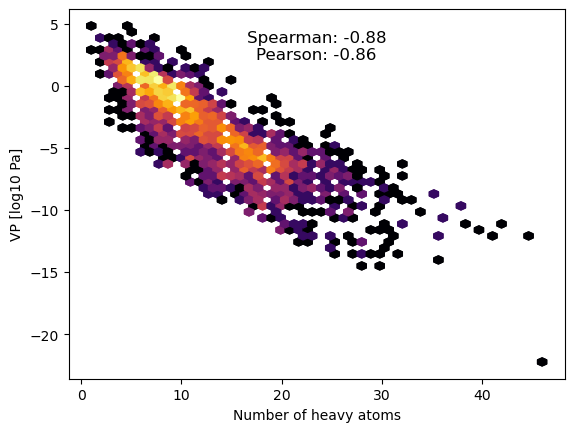

In [187]:
#plot vp against number of heavy atoms
import matplotlib.pyplot as plt
hexbin = plt.hexbin(df_features_cleaner['NumHeavyAtoms'], df_features_cleaner['vp'], gridsize=50, cmap='inferno', bins='log', mincnt=1)
counts = plt.hexbin(df_features_cleaner['NumHeavyAtoms'], df_features_cleaner['vp'], gridsize=50, cmap='inferno', bins='log', mincnt=1).get_array()
spearman = df_features_cleaner['NumHeavyAtoms'].corr(df_features_cleaner['vp'], method='spearman')
pearson = df_features['NumHeavyAtoms'].corr(df_features_cleaner['vp'], method='pearson')
plt.text(0.5, 0.9, f'Spearman: {np.round(spearman, 2)}\nPearson: {np.round(pearson, 2)}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=12)
plt.xlabel('Number of heavy atoms')
plt.ylabel('VP [log10 Pa]')
plt.show()

In [188]:
from rdkit import Chem
import psycopg2
import pandas as pd
import psycopg2
hostname = 'scotland'
dbname = 'cs_mdfps'
username = 'cschiebroek'
import warnings
# Suppress the FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)
from rdkit.Chem import Descriptors
from rdkit.Chem.Descriptors import CalcMolDescriptors
import sys
sys.path.append('../..')
from carl import utils_carl
from carl.utils_carl import train_pred_xgboost_2d, getStatValues,density_plot, get_mdfps
from functools import reduce
import sys
sys.path.append('../..')
from carl import utils_carl
from carl.utils_carl import train_pred_xgboost_2d, getStatValues,density_plot, get_mdfps
from functools import reduce

In [195]:
params = {
    # Parameters that we are going to tune.
    'max_depth':3,
    'min_child_weight': 6,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    "objective" : 'reg:squarederror',
}
#load X features: carl/RDKit_2D_descriptors.pkl
RDKit_feature_names = pd.read_pickle('/localhome/cschiebroek/MDFPs/mdfptools/carl/data/outputs/RDKit_2D_descriptors.pkl')
output_2d_only = train_pred_xgboost_2d(df_features_cleaner,params=params,X_features=RDKit_feature_names,y_label='vp')
real_2d_only, prediction_2d_only = (reduce(lambda a,b : list(a)+list(b) , output_2d_only[0]), reduce(lambda a,b : list(a)+list(b), output_2d_only[1]))
mdfp_features_no_2d = ['water_intra_crf_mean', 'water_intra_crf_std', 'water_intra_crf_median', 'water_intra_lj_mean', 'water_intra_lj_std', 'water_intra_lj_median', 'water_total_crf_mean', 'water_total_crf_std', 'water_total_crf_median', 'water_total_lj_mean', 'water_total_lj_std', 'water_total_lj_median', 'water_intra_ene_mean', 'water_intra_ene_std', 'water_intra_ene_median', 'water_total_ene_mean', 'water_total_ene_std', 'water_total_ene_median', 'water_rgyr_mean', 'water_rgyr_std', 'water_rgyr_median', 'water_sasa_mean', 'water_sasa_std', 'water_sasa_median']
output_combined = train_pred_xgboost_2d(df_features_cleaner,params=params,X_features=RDKit_feature_names+mdfp_features_no_2d,y_label='vp')
real_combined, prediction_combined = (reduce(lambda a,b : list(a)+list(b) , output_combined[0]), reduce(lambda a,b : list(a)+list(b), output_combined[1]))
mdfp_features_all = ['NumHeavyAtoms', 'NumRotatableBonds', 'NumN', 'NumO', 'NumF', 'NumP', 'NumS', 'NumCl', 'NumBr', 'NumI', 'water_intra_crf_mean', 'water_intra_crf_std', 'water_intra_crf_median', 'water_intra_lj_mean', 'water_intra_lj_std', 'water_intra_lj_median', 'water_total_crf_mean', 'water_total_crf_std', 'water_total_crf_median', 'water_total_lj_mean', 'water_total_lj_std', 'water_total_lj_median', 'water_intra_ene_mean', 'water_intra_ene_std', 'water_intra_ene_median', 'water_total_ene_mean', 'water_total_ene_std', 'water_total_ene_median', 'water_rgyr_mean', 'water_rgyr_std', 'water_rgyr_median', 'water_sasa_mean', 'water_sasa_std', 'water_sasa_median']
output_combined_mdfp = train_pred_xgboost_2d(df_features_cleaner,params=params,X_features=mdfp_features_all,y_label='vp')
real_combined_mdfp, prediction_combined_mdfp = (reduce(lambda a,b : list(a)+list(b) , output_combined_mdfp[0]), reduce(lambda a,b : list(a)+list(b), output_combined_mdfp[1]))



Plot 1 Stats:
RMSE:  0.9694617339887853
MAE:  0.6312367940199419
R2:  0.9213825904736104
Plot 2 Stats:
RMSE:  0.9907510434452256
MAE:  0.6541929437215241
R2:  0.9179354693468126
Plot 3 Stats:
RMSE:  1.1014955625897376
MAE:  0.7370407781005855
R2:  0.8985053389456751


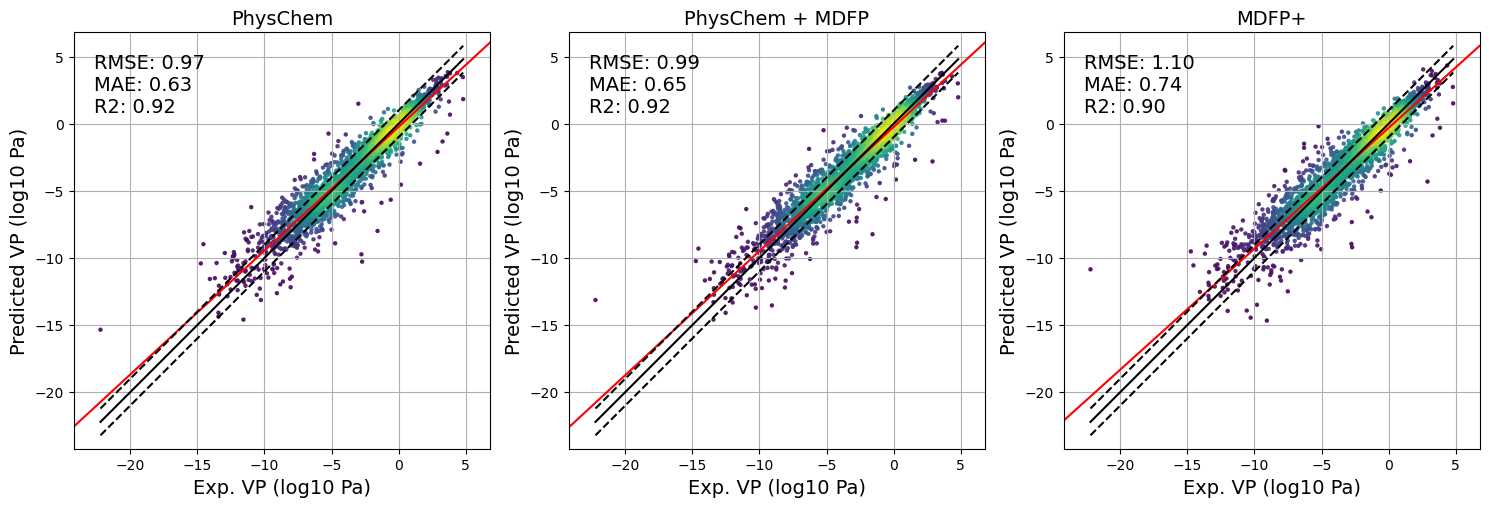

In [196]:
from carl.utils_carl import density_plot_multiple
density_plot_multiple(reals = [real_2d_only,real_combined,real_combined_mdfp],predictions=[prediction_2d_only,prediction_combined,prediction_combined_mdfp],titles = ['PhysChem','PhysChem + MDFP','MDFP+'])